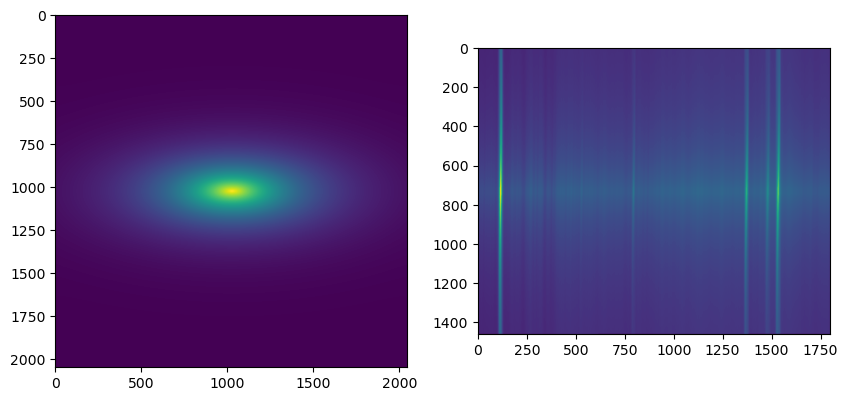

In [2]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
u.imperial.enable()


galaxSpect = 'Galax_Spect.fits'
#pyfits.info(file_flux)
hdu = pyfits.open(galaxSpect)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header


def imgEnd(header):
    return header["CRVAL1"]+(header["NAXIS1"]-2)*header["CDELT1"]
    
#xIMG = np.arange(headerIMG["CRVAL1"], imgEnd(headerIMG) + headerIMG["CDELT1"], headerIMG["CDELT1"])

#yIMG = lambda x: IMG[x]


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [3]:
headerIMG

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXESD=                    2                                                  
CRPIX1D =              1024.5                                                   
CRPIX2D =              1024.5                                                   
CDELT1D =               0.018                                                   
CDELT2D =               0.018                                                   
CUNIT1D = 'mm      '        

In [4]:
headerLSS

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    1 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  1.1745426707708E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

In [5]:
# define physical absolute axis
xIMG = headerIMG["CRVAL1"] + (np.arange(headerIMG["NAXIS1"]) - (headerIMG["CRPIX1"] - 1)) * headerIMG["CDELT1"]
yIMG = headerIMG["CRVAL2"] + (np.arange(headerIMG["NAXIS2"]) - (headerIMG["CRPIX2"] - 1)) * headerIMG["CDELT2"]

x_DEG_IMG = xIMG * u.deg
y_DEG_IMG = yIMG * u.deg

xLSS = headerLSS["CRVAL1"] + (np.arange(headerLSS["NAXIS1"]) - (headerLSS["CRPIX1"] - 1)) * headerLSS["CDELT1"]
yLSS = headerLSS["CRVAL2"] + (np.arange(headerLSS["NAXIS2"]) - (headerLSS["CRPIX2"] - 1)) * headerLSS["CDELT2"]

x_M_LSS = xLSS * u.m
y_ARCSEC_LSS = yLSS * u.arcsec

# define physical relative IMAGE axis with proper units
xIMGStart = headerIMG["CRVAL1"] * u.deg
yIMGStart = headerIMG["CRVAL2"] * u.deg

x_DEG_IMG_rel = x_DEG_IMG - xIMGStart
y_DEG_IMG_rel = y_DEG_IMG - yIMGStart

x_ARCSEC_IMG_rel = x_DEG_IMG_rel.to(u.arcsec)
y_ARCSEC_IMG_rel = y_DEG_IMG_rel.to(u.arcsec)

# define physical (relative) LSS axis with proper units
x_NM_LSS = x_M_LSS.to(u.nm)

yLSSStart = headerLSS["CRVAL2"] * u.arcsec

y_ARCSEC_LSS_rel = y_ARCSEC_LSS - yLSSStart

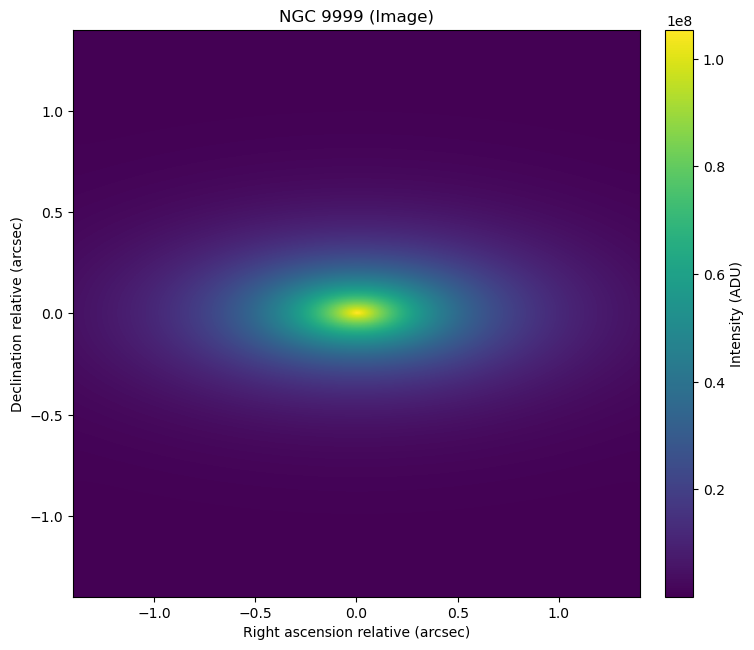

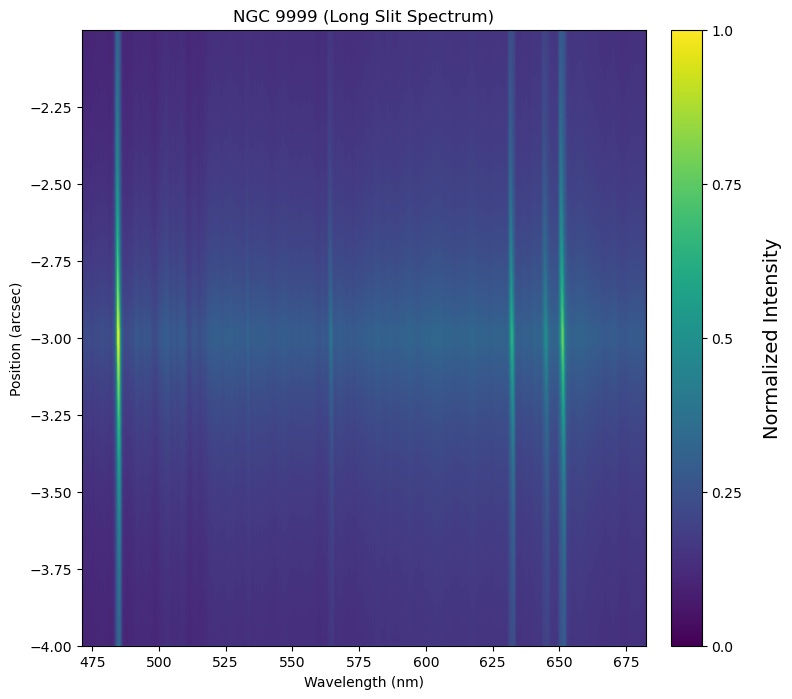

In [55]:
import matplotlib.colors as colors

# IMAGE der Galaxie mit relativen physikalischen Achsen darstellen
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

IMGimage = ax.imshow(IMG, cmap='viridis', origin='lower', interpolation='nearest', extent=[x_ARCSEC_IMG_rel.value.min(), x_ARCSEC_IMG_rel.value.max(), y_ARCSEC_IMG_rel.value.min(), y_ARCSEC_IMG_rel.value.max()])
plt.colorbar(IMGimage, ax=ax, orientation='vertical', label='Intensity (ADU)', fraction=0.0457, pad=0.04)

ax.set_xlabel('Right ascension relative (arcsec)')
ax.set_ylabel('Declination relative (arcsec)')

plt.title('NGC 9999 (Image)')
plt.show()

# LSS der Galaxie mit (relativen) physikalischen Achsen darstellen
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)




LSSimage = ax.imshow(LSS, cmap='viridis', origin='lower', norm=norm, interpolation='nearest', extent=[x_NM_LSS.value.min(), x_NM_LSS.value.max(), y_ARCSEC_LSS.value.min(), y_ARCSEC_LSS.value.max()])

ax.set_aspect('auto')

#normalization
data_min = LSS.min()
data_max = LSS.max()
norm = colors.Normalize(vmin=data_min, vmax=data_max)
num_ticks = 5  # Number of ticks you want
tick_values = np.linspace(data_min, data_max, num_ticks)

cbar = plt.colorbar(
    LSSimage,
    ax=ax,
    orientation='vertical',
    label='Normalized Intensity', 
    fraction=0.05,
    pad=0.04
)
cbar.set_ticks(tick_values)
cbar.set_label('Normalized Intensity', fontsize=14, labelpad=15)
tick_labels = np.linspace(0, 1, num_ticks)
cbar.set_ticklabels(np.round(tick_labels, 2))
cbar.ax.tick_params(labelsize=10)



#plt.colorbar(LSSimage, ax=ax, orientation='vertical', label='Intensity (ADU)', fraction=0.0373, pad=0.04)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Position (arcsec)')

plt.title('NGC 9999 (Long Slit Spectrum)')
plt.show()

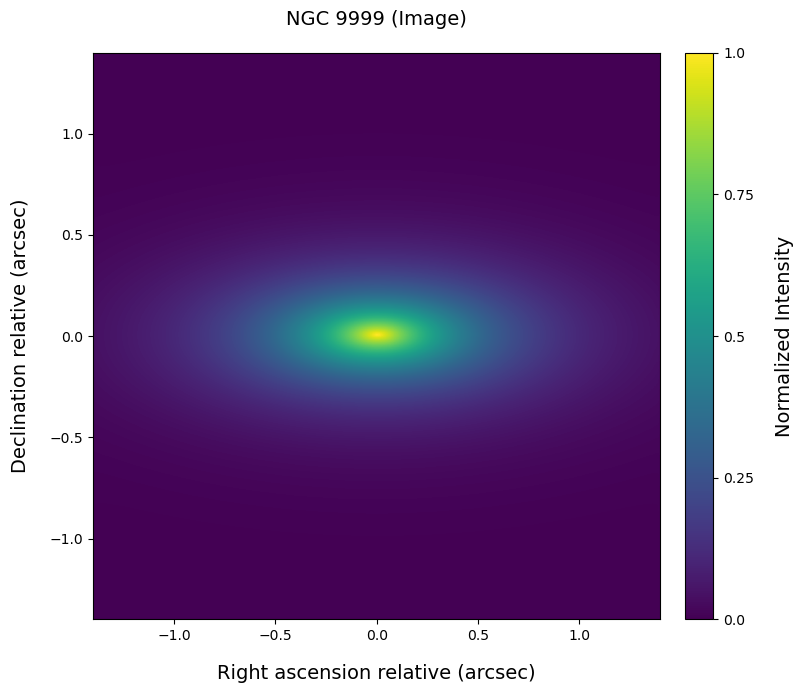

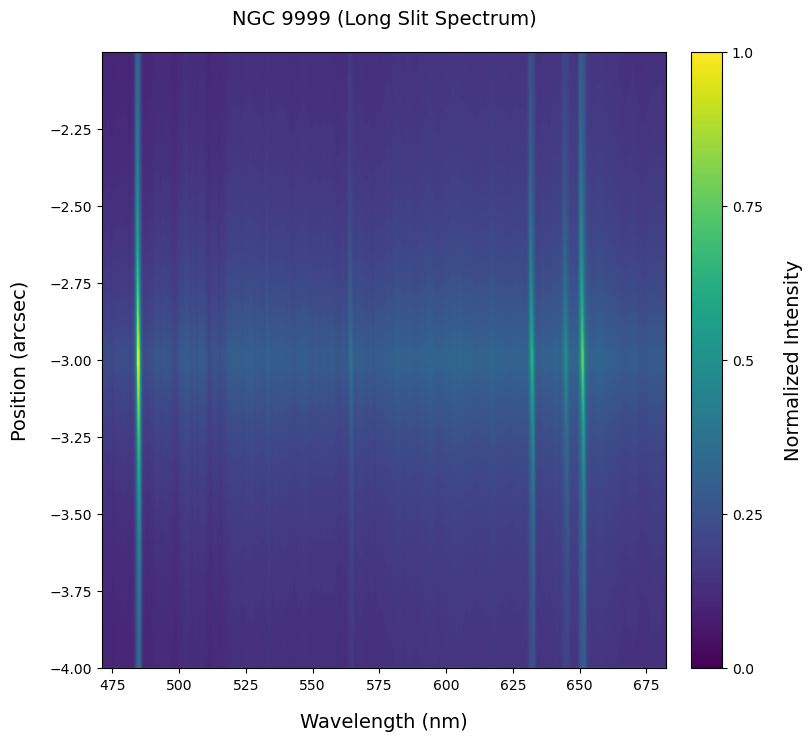

In [ ]:

import matplotlib.colors as colors

plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

# Compute normalization for IMG data
data_min_IMG = IMG.min()
data_max_IMG = IMG.max()
norm_IMG = colors.Normalize(vmin=data_min_IMG, vmax=data_max_IMG)

# Show image with normalization
IMGimage = ax.imshow(IMG, cmap='viridis', origin='lower', interpolation='nearest', 
                     extent=[x_ARCSEC_IMG_rel.value.min(), x_ARCSEC_IMG_rel.value.max(), 
                             y_ARCSEC_IMG_rel.value.min(), y_ARCSEC_IMG_rel.value.max()],
                     norm=norm_IMG)

num_ticks = 5
tick_values_IMG = np.linspace(data_min_IMG, data_max_IMG, num_ticks)

cbar_IMG = plt.colorbar(IMGimage, ax=ax, orientation='vertical', fraction=0.0457, pad=0.04)
cbar_IMG.set_ticks(tick_values_IMG)
# Map the tick labels from data range to [0,1]
tick_labels_IMG = np.linspace(0, 1, num_ticks)
cbar_IMG.set_ticklabels(np.round(tick_labels_IMG, 2))
cbar_IMG.set_label('Normalized Intensity', fontsize=14, labelpad=15)
cbar_IMG.ax.tick_params(labelsize=10)

ax.set_xlabel('Right ascension relative (arcsec)', fontsize=14, labelpad=15)
ax.set_ylabel('Declination relative (arcsec)', fontsize=14, labelpad=15)
plt.title('NGC 9999 (Image)', fontsize=14, pad=20)
plt.show()

# LSS der Galaxie mit (relativen) physikalischen Achsen darstellen
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

# Compute normalization for LSS data
data_min_LSS = LSS.min()
data_max_LSS = LSS.max()
norm_LSS = colors.Normalize(vmin=data_min_LSS, vmax=data_max_LSS)

LSSimage = ax.imshow(LSS, cmap='viridis', origin='lower', norm=norm_LSS, interpolation='nearest', 
                     extent=[x_NM_LSS.value.min(), x_NM_LSS.value.max(), 
                             y_ARCSEC_LSS.value.min(), y_ARCSEC_LSS.value.max()])
ax.set_aspect('auto')

tick_values_LSS = np.linspace(data_min_LSS, data_max_LSS, num_ticks)

cbar_LSS = plt.colorbar(LSSimage, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar_LSS.set_ticks(tick_values_LSS)
tick_labels_LSS = np.linspace(0, 1, num_ticks)
cbar_LSS.set_ticklabels(np.round(tick_labels_LSS, 2))
cbar_LSS.set_label('Normalized Intensity', fontsize=14, labelpad=15)
cbar_LSS.ax.tick_params(labelsize=10)

ax.set_xlabel('Wavelength (nm)', fontsize=14, labelpad=15)
ax.set_ylabel('Position (arcsec)', fontsize=14, labelpad=15)
plt.title('NGC 9999 (Long Slit Spectrum)' , fontsize=14, pad=20)
plt.show()



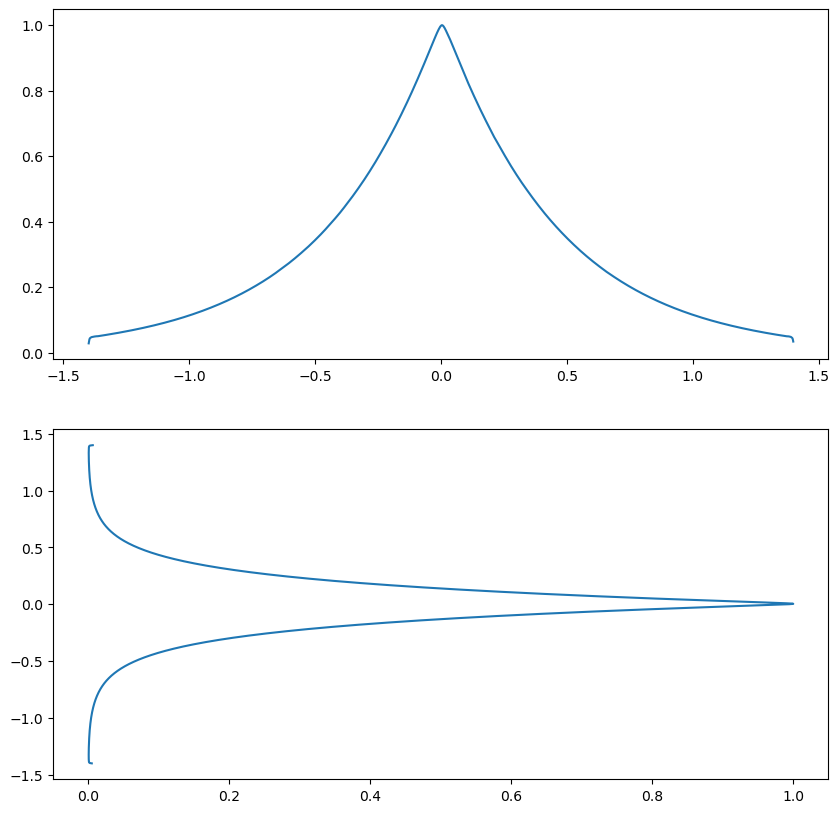

In [7]:
xStartIMG = headerIMG['CRVAL1'] - headerIMG['CRPIX1']*headerIMG['CDELT1']
xEndIMG = headerIMG['CRVAL1'] + (2047 - headerIMG['CRPIX1'])*headerIMG['CDELT1']
xDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT1'])

yStartIMG = headerIMG['CRVAL2'] - headerIMG['CRPIX2']*headerIMG['CDELT2']
yEndIMG = headerIMG['CRVAL2'] + (2047 - headerIMG['CRPIX2'])*headerIMG['CDELT2']
yDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT2'])

fix, axis = plt.subplots(2, 1, figsize=(10, 10))
#flux = np.nansum(IMG, 1)
axis[0].plot(x_ARCSEC_IMG_rel.value, IMG[1024, :]/max(IMG[1024, :]))
axis[1].plot(IMG[:, 1024]/max(IMG[:, 1024]), y_ARCSEC_IMG_rel.value)

plt.show()

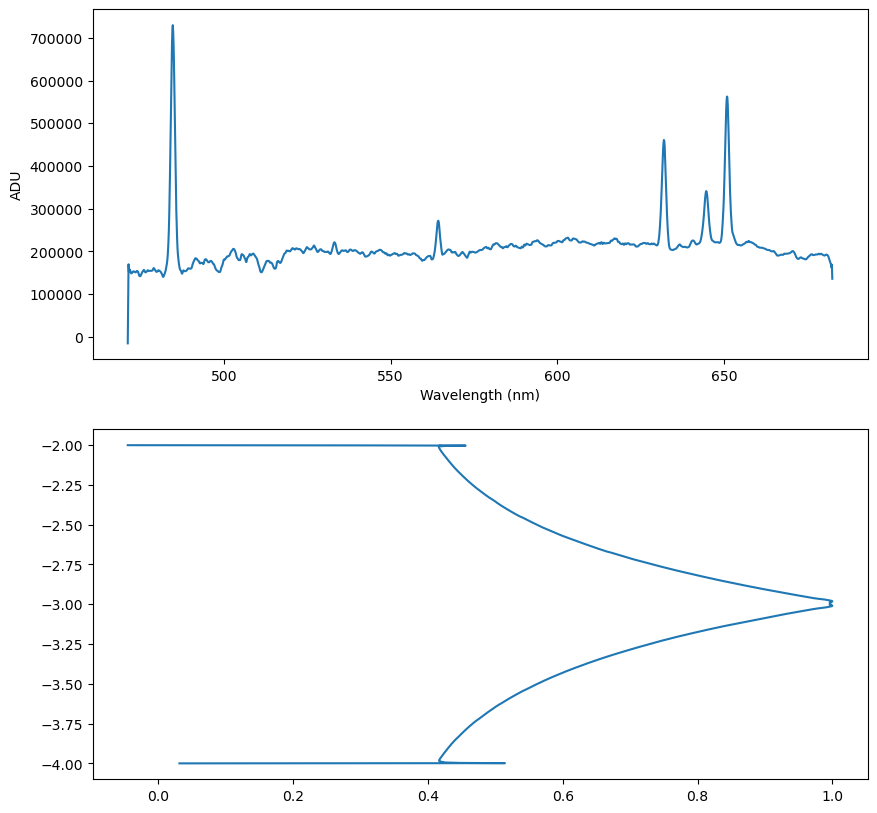

In [8]:
delX = (headerLSS['CDELT1'] * u.m).to(u.nm)
delY = (headerLSS['CDELT2'] * u.arcsec).to(u.deg)

xStartLSS = (headerLSS['CRVAL1'] * u.m).to(u.nm)
xEndLSS = ((xStartLSS + (1799 * delX)) * u.nm)
xNMLSS = (np.arange(xStartLSS.value, xEndLSS.value + delX.value, delX.value) * u.nm)

yStartLSS = (headerLSS['CRVAL2'] * u.arcsec).to(u.deg)
yEndLSS = ((yStartLSS.value + (1462 * delY.value)) * u.deg)
yDegLSS = (np.arange(yStartLSS.value, yEndLSS.value + delY.value, delY.value) * u.deg)


fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(x_NM_LSS.value, LSS[731, :])
axis[0].set_xlabel('Wavelength (nm)')
axis[0].set_ylabel('ADU')

#flux = np.nansum(LSS[:, 731], axis=1)
axis[1].plot(LSS[:, 731]/max(LSS[:, 731]), y_ARCSEC_LSS.value)

plt.show()



Corrected Wavelengths: 
 1:	629.8500nm 
 2:	821.6000nm 
 3:	846.3000nm


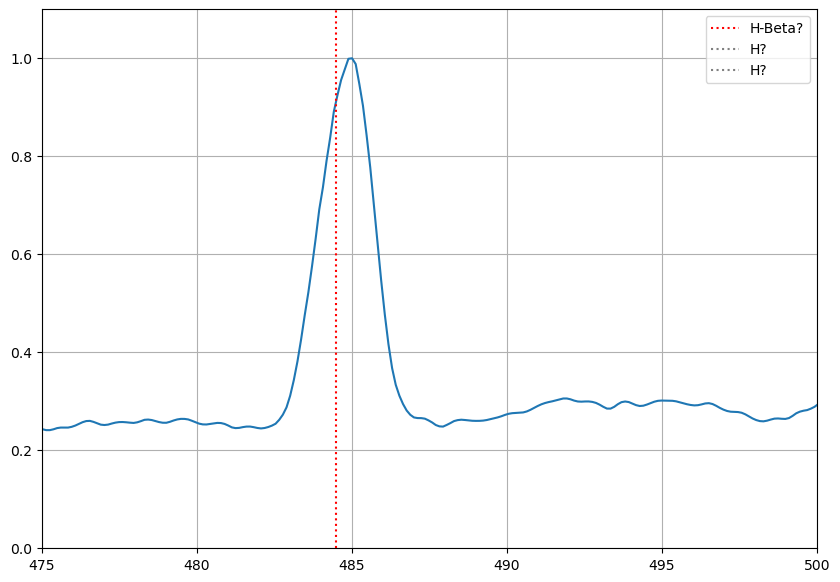

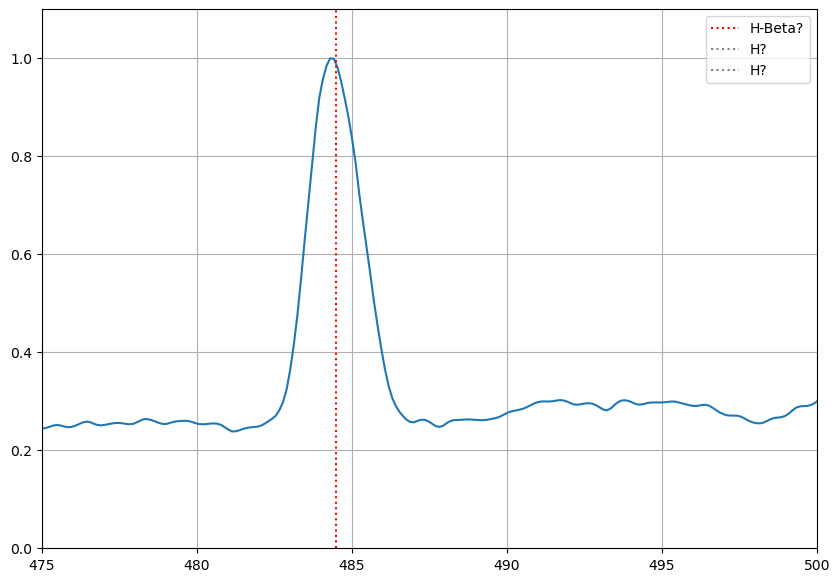

In [9]:
#Doppler Correction and Gauss-Fit

Z = 0.3


#z = femit/fobs - 1 => femit = fobs*(1+z)
def redshiftCorrection(wavelength):
    return(wavelength * (1+Z))


#Approx redshifted emmision-wavelengths in nm:
line1 = 484.5
line2 = 632
line3 = 651

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(x_NM_LSS.value, LSS[100, :]/max(LSS[100, :]))
ax.vlines(line1, 0, 1.1, linestyles=':', colors='r', label='H-Beta?')
ax.vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='H?')
ax.vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='H?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax.set_xlim(475, 500)
ax.set_ylim(0, 1.1)
ax.grid()
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(x_NM_LSS.value, LSS[1400, :]/max(LSS[1400, :]))
ax.vlines(line1, 0, 1.1, linestyles=':', colors='r', label='H-Beta?')
ax.vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='H?')
ax.vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='H?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax.set_xlim(475, 500)
ax.set_ylim(0, 1.1)
ax.grid()
ax.legend()


corrLine1 = redshiftCorrection(line1)
corrLine2 = redshiftCorrection(line2)
corrLine3 = redshiftCorrection(line3)

print(f'Corrected Wavelengths: \n 1:\t{corrLine1:.4f}nm \n 2:\t{corrLine2:.4f}nm \n 3:\t{corrLine3:.4f}nm')


Closes guesses with NIST-ASD so far:

Vanadium II: 629.8503
Cobalt II: 821.5998
Ne I 	846.3357



NameError: name 'xDEGIMG' is not defined

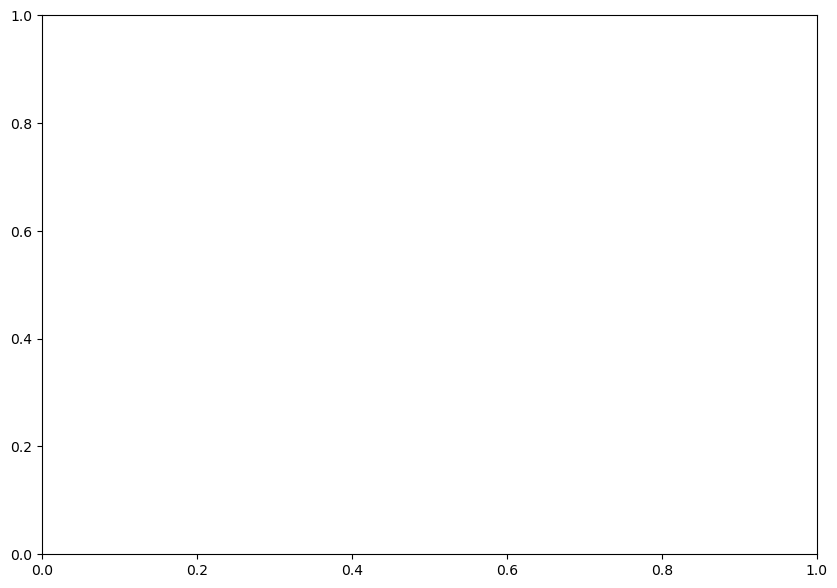

In [10]:
#Rot.-Curve (wrong slices so far)
sliceSize = 150

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
      
for i in range(len(xDEGIMG)):
    ax.plot(xDEGIMG, IMG[:, i:sliceSize])

ax.vlines(165.4, 0, 1e7, linestyles='-', colors='gray')

ax.set_xlabel='deg'
ax.set_ylabel='deg'
